In [1]:
from matplotlib import pyplot as plt
import microhapdb
import pandas as pd

In [2]:
markers = pd.read_csv("../microhapdb/data/marker.csv")
aes = pd.read_csv("../microhapdb/data/marker-aes.csv")

In [3]:
aes = aes[aes.Population == "1KGP"].rename(columns={"Marker": "Name"})
marker_aes = pd.merge(markers, aes, on="Name")
marker_aes = marker_aes[marker_aes.Chrom != "chrX"]
marker_aes = marker_aes[["Name", "Extent", "Source", "Ae"]]
marker_aes

,Name,Extent,Source,Ae
0,mh01LW-3,58,Zhang2023,1.000
1,mh01SCUZJ-0000740,345,Zhu2023,7.362
2,mh01WL-090,195,Yu2022G1,3.230
3,mh01KK-172.v1,226,Kidd2018,2.932
4,mh01KK-172.v2,226,Gandotra2020,3.481
...,...,...,...,...
3037,mh22WL-005.v1,133,Yu2022G1;Yu2022G2;Yu2022G3,3.930
3038,mh22WL-005.v2,56,Yu2022G4,3.320
3039,mh22SCUZJ-0146198,335,Zhu2023,5.698
3040,mh22ZHA-008,123,Kureshi2020,3.720


In [4]:
kidd = marker_aes[marker_aes.Name.isin(microhapdb.panel.kidd2022())]
delapuente = marker_aes[marker_aes.Source.str.contains("delaPuente2020")]
wu = marker_aes[marker_aes.Source.str.contains("Wu2021")]
fan = marker_aes[marker_aes.Source.str.contains("Fan2022")]
du = marker_aes[marker_aes.Source.str.contains("Du2023")]

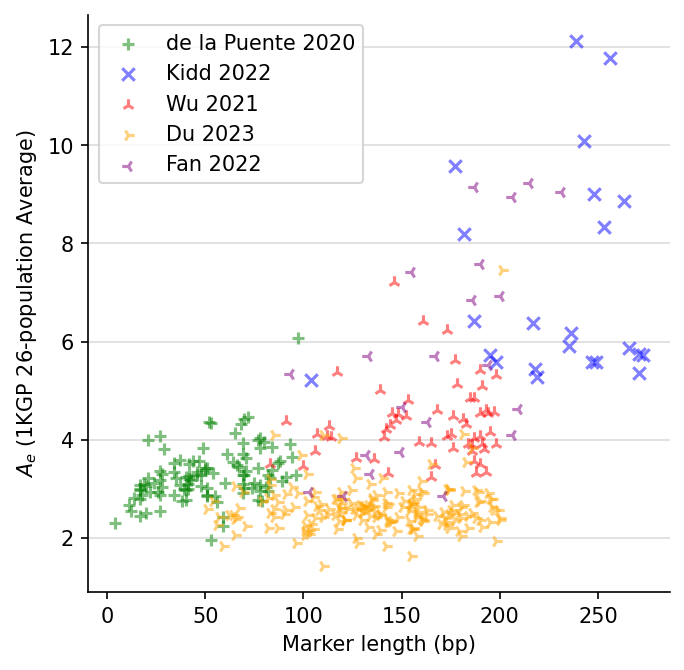

In [5]:
plt.figure(figsize=(5, 5), dpi=150)
plt.scatter(delapuente.Extent, delapuente.Ae, marker="+", color="green", alpha=0.5, label="de la Puente 2020")
plt.scatter(kidd.Extent, kidd.Ae, marker="x", color="blue", alpha=0.5, label="Kidd 2022")
plt.scatter(wu.Extent, wu.Ae, marker="2", color="red", alpha=0.5, label="Wu 2021")
plt.scatter(du.Extent, du.Ae, marker="4", color="orange", alpha=0.5, label="Du 2023")
plt.scatter(fan.Extent, fan.Ae, marker="3", color="purple", alpha=0.5, label="Fan 2022")
plt.ylabel("$A_e$ (1KGP 26-population Average)")
plt.xlabel("Marker length (bp)")
plt.legend(loc="upper left")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().yaxis.grid(True, color="#DDDDDD")
plt.gca().set_axisbelow(True)
plt.savefig("ae_vs_length_2024-09-26.png")

In [6]:
marker_aes_hq = marker_aes[(marker_aes.Ae >= 8.0) & (marker_aes.Source.str.contains("Fan2022"))]
marker_aes_hq = marker_aes_hq.sort_values("Ae", ascending=False)
print(len(marker_aes_hq))
print(marker_aes_hq)

4
                Name  Extent   Source     Ae
2660  mh17FHL-005.v1     215  Fan2022  9.232
386   mh02ZHA-013.v2     187  Fan2022  9.158
2548   mh16KK-259.v3     231  Fan2022  9.043
1694     mh10FHL-001     206  Fan2022  8.942


In [7]:
marker_aes_hq = marker_aes[(marker_aes.Ae >= 8.0) & (marker_aes.Name.isin(microhapdb.panel.kidd2022()))]
marker_aes_hq = marker_aes_hq.sort_values("Ae", ascending=False)
print(len(marker_aes_hq))
print(marker_aes_hq)

8
               Name  Extent                                Source      Ae
456   mh02KK-014.v2     239                           Pakstis2021  12.127
910   mh05KK-170.v3     256                           Pakstis2021  11.777
161   mh01KK-212.v2     243                           Pakstis2021  10.076
2021  mh12KK-201.v2     177                           Pakstis2021   9.580
2547  mh16KK-259.v2     248                           Pakstis2021   9.013
2168  mh13KK-218.v2     263              Gandotra2020;Pakstis2021   8.862
2213  mh13KK-221.v1     253  Gandotra2020;Pakstis2021;NimaGen2023   8.327
1258  mh07KK-009.v2     182                           Pakstis2021   8.196
